# Introduction
The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

# Table of Contents
>1. Gather
>2. Assess
>3. Clean

In [1]:
import pandas as pd
import numpy as np
import re
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import json
from functools import reduce

# Gather

>First Source

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> Second source(url)

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
df_image = pd.read_csv('image_predictions.tsv', sep='\t')

In [6]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


>Third Source(API)

In [8]:
import tweepy

consumer_key = 'CIhlMvNExGkmRqgUAAu9owbdz'
consumer_secret = 'POc1v62TqNLMn2kggZzwIkj4HzLRJOCldpZNwafNr6DndO56Tn'
access_token = '831110322480152578-eLWzG97jNVj2Uf6XXHi3fNrNkq7hl4y'
access_secret = 'pCq1RENOEtAioLRTwCKPR6Yh1mI94Cza7waRXbrmfrnTr'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
##from timeit import default_timer as timer

#tweet_ids = twitter_archive.tweet_id.values
#len(tweet_ids)
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
 #   for tweet_id in tweet_ids:
  #      count += 1
   #     print(str(count) + ": " + str(tweet_id))
    #    try:
     #       tweet = api.get_status(tweet_id, tweet_mode='extended')
      #      print("Success")
       #     json.dump(tweet._json, outfile)
        #    outfile.write('\n')
        #except tweepy.TweepError as e:
         #   print("Fail")
          #  fails_dict[tweet_id] = e
           # pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [10]:
with open('tweet_json.txt') as json_text:
    tweet_json = pd.DataFrame(columns = ['tweet_id','favorites','retweets'])
    
    for info in json_text:
        tweets = json.loads(info)
        data = {'tweet_id': tweets['id'],'favorites': tweets['favorite_count'],
                                      'retweets': tweets['retweet_count']}
        ser = pd.Series(data)
        tweet_json = tweet_json.append(data,ignore_index=True)
tweet_json.head()

,tweet_id,favorites,retweets
0,892420643555336193,36192,7703
1,892177421306343426,31209,5698
2,891815181378084864,23499,3778
3,891689557279858688,39473,7862
4,891327558926688256,37684,8480


In [11]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   1752 non-null   object
 1   favorites  1752 non-null   object
 2   retweets   1752 non-null   object
dtypes: object(3)
memory usage: 41.2+ KB


# Assess

>Let's Assess the twitter_archive, df_image, tweet_json dataframes and find out quality and tidyness issues

In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
twitter_archive.query('rating_denominator <10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [14]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [16]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [17]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [18]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [19]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Oliver         11
             ... 
Rinna           1
Jeb             1
Cecil           1
Christoper      1
Ivar            1
Name: name, Length: 957, dtype: int64

>Let's find out out some unusal names which I have noticed by visual assessment

In [20]:
lc = []
for row in twitter_archive['name']:
    if row[0].islower() and row not in lc:
        lc.append(row)
print(lc)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


>As IQR is 10, find out numerator which are below 10

In [21]:
twitter_archive.query('rating_denominator <10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [22]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   1752 non-null   object
 1   favorites  1752 non-null   object
 2   retweets   1752 non-null   object
dtypes: object(3)
memory usage: 41.2+ KB


In [25]:
tweet_json.describe()

,tweet_id,favorites,retweets
count,1752,1752,1752
unique,1752,1480,1366
top,748324050481647620,0,521
freq,1,161,5


# Tidiness

>1. Merge all the three dataframes into one data frame
>2. doggo,floofer,pupper and puppo should be melted.

# Quality

>1.      Removein_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,source,expand_url,img_num.
> 2. favorites & retweets should be int64
> 3. As per WeRateDogs the denominators are mostly 10 or above.
> 4. source column is illegible
> 5. tweet_id should be object 
> 6. Columns which have **None** replace with **NaN**.
> 7. Time_stamp dtpye is object
> 8. Incorrect dogs name like: "a", "an", "such","the", "very", etc...
 


> # Tidiness issues

# Issue 1

In [26]:
#Define
#Merge all the three dataframes into one data frame

In [27]:
#code
from functools import reduce

In [28]:
dfs = [twitter_archive,tweet_json,df_image]

In [29]:
df = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)

In [30]:
#Test
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1169,672997845381865473,NaN,NaN,2015-12-05 04:36:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kenzie. She is a fluff ball. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672997845...,...,1,chow,0.517255,True,Pomeranian,0.206053,True,koala,0.127037,False
1502,666739327293083650,NaN,NaN,2015-11-17 22:06:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lugan. He is a Bohemian Rhapsody. Very...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666739327...,...,1,miniature_poodle,0.546933,True,cocker_spaniel,0.165255,True,toy_poodle,0.095959,True
299,826476773533745153,NaN,NaN,2017-01-31 17:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pilot. He has mastered the synchronize...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826476773...,...,1,German_shepherd,0.741860,True,Tibetan_mastiff,0.122812,True,kelpie,0.100460,True
55,880221127280381952,NaN,NaN,2017-06-29 00:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jesse. He's a Fetty Woof. His tongue ejec...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880221127...,...,1,Chihuahua,0.238525,True,meerkat,0.104256,False,clumber,0.052580,True
501,793286476301799424,NaN,NaN,2016-11-01 03:00:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moreton. He's the Good Boy Who Lived. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793286476...,...,1,Afghan_hound,0.274637,True,borzoi,0.142204,True,doormat,0.109677,False


# Issue 2

In [31]:
#Define
#doggo,floofer,pupper and puppo should be melted.

In [32]:
#Code
df['type_dog'] = df['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [33]:
df[['type_dog','doggo', 'floofer', 'pupper', 'puppo']].head(15)

,type_dog,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None
5,NaN,None,None,None,None
6,NaN,None,None,None,None
7,NaN,None,None,None,None
8,NaN,None,None,None,None
9,doggo,doggo,None,None,None


In [34]:
df = df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [35]:
#Test
df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,type_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,NaN


># Quality issues

# Issue 1

In [36]:
#define
#Removein_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,source,expand_url,img_num.
df.drop(['in_reply_to_status_id',
                     'in_reply_to_user_id',
                     'retweeted_status_id',
                     'retweeted_status_user_id',
                     'retweeted_status_timestamp','expanded_urls','img_num'],axis=1,inplace=True)

In [37]:
#Test
df.sample(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,favorites,retweets,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,type_dog
1228,671743150407421952,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,11,10,a,724,227,https://pbs.twimg.com/media/CVKC1IfWIAAsQks.jpg,toy_poodle,0.419427,True,miniature_poodle,0.237067,True,swing,0.104193,False,NaN
1535,666058600524156928,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,8,10,the,105,54,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,NaN


# Issue 2

In [38]:
#define
#favorites & retweets should be int64

In [39]:
#code
def change(column):
    df[column] = df[column].astype(int)

In [40]:
change('favorites')
change('retweets')

In [41]:
#test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 0 to 1543
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1544 non-null   object 
 1   timestamp           1544 non-null   object 
 2   source              1544 non-null   object 
 3   text                1544 non-null   object 
 4   rating_numerator    1544 non-null   int64  
 5   rating_denominator  1544 non-null   int64  
 6   name                1544 non-null   object 
 7   favorites           1544 non-null   int64  
 8   retweets            1544 non-null   int64  
 9   jpg_url             1544 non-null   object 
 10  p1                  1544 non-null   object 
 11  p1_conf             1544 non-null   float64
 12  p1_dog              1544 non-null   bool   
 13  p2                  1544 non-null   object 
 14  p2_conf             1544 non-null   float64
 15  p2_dog              1544 non-null   bool   
 16  p3    

# Issue 3

In [42]:
#define
#As per IQR is 10, remove below 10.
df.query('rating_denominator <10')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,favorites,retweets,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,type_dog
405,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,5435,1466,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,NaN
1524,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,1,2,an,136,62,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,NaN


In [43]:
#code
df.drop([405],inplace=True)
df.drop([1524],inplace=True)

In [44]:
#test
df.query('rating_denominator <10')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,favorites,retweets,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,type_dog


# Issue 4

In [45]:
#define
#source column is illegible

#code
import re
df['source'] = df['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

In [46]:
#Test
df['source'].value_counts()

Twitter for iPhone    1503
Twitter Web Client      29
TweetDeck               10
Name: source, dtype: int64

# Issue 5

In [47]:
#define
#tweet_id should be object

#code
df['tweet_id'] = df['tweet_id'].astype(str)

In [48]:
#test
df.tweet_id.dtypes

dtype('O')

# Issue 6

In [49]:
#define
#Columns which have None replace with NaN.

#code
df['type_dog'] = df['type_dog'].replace('None',np.NaN)

In [50]:
#test
df['type_dog'].value_counts()

pupper     144
doggo       61
puppo       25
floofer      3
Name: type_dog, dtype: int64

# Issue 7

In [51]:
#define
#Time_stamp dtpye is object

#code
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [52]:
#test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1542 entries, 0 to 1543
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1542 non-null   object             
 1   timestamp           1542 non-null   datetime64[ns, UTC]
 2   source              1542 non-null   object             
 3   text                1542 non-null   object             
 4   rating_numerator    1542 non-null   int64              
 5   rating_denominator  1542 non-null   int64              
 6   name                1542 non-null   object             
 7   favorites           1542 non-null   int64              
 8   retweets            1542 non-null   int64              
 9   jpg_url             1542 non-null   object             
 10  p1                  1542 non-null   object             
 11  p1_conf             1542 non-null   float64            
 12  p1_dog              1542 non-null 

# Issue 8

In [53]:
#define
#Incorrect dogs name like: "a", "an", "such","the", "very", etc...

#code
df.name.replace(['such', 'an', 'the', 'just', 'by', 'a', 'mad', 'old', 'space', 
             'quite', 'actually', 'infuriating', 'all', 'officially', 'my', 'unacceptable', 'incredibly',
              'not', '0','O','life', 'one', 'his', 'very'],np.NaN, inplace =True)

In [54]:
#test
df.name.value_counts()

None        429
Penny         9
Tucker        8
Charlie       8
Bo            8
           ... 
Rizzo         1
Fletcher      1
Randall       1
Dale          1
Misty         1
Name: name, Length: 725, dtype: int64

In [55]:
df = df.rename(columns={'rating_numerator':'numerator','rating_denominator':'denominator'})

# Data Visualisation

># Dogs with high likes

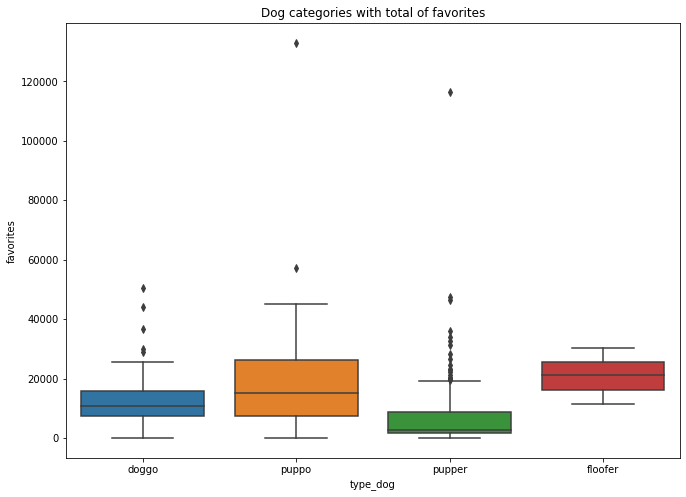

In [56]:
plt.figure(figsize=(11,8))
sns.boxplot(x="type_dog", y="favorites", data=df).set_title('Dog categories with total of favorites');

>According to box plot it is precived that puppo has highest recored rate of likes followed by doggo,floofer, & pupper 

> # Distribution of Rating Numerators

In [57]:
gdf = df.query('numerator <= 14')

In [58]:
a = gdf.groupby(['numerator']).count()['tweet_id']

In [59]:
b = np.array(a)

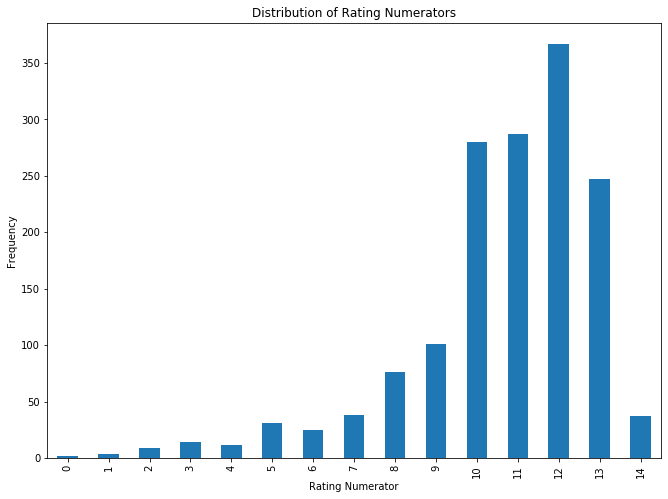

In [60]:
a.plot(kind='bar',figsize=(11,8))
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Numerators');

>Form perceiving the bar graph, it illustrates that ratings are 14 and below, and ratings above 20 are usually given to images that contain more than one or less than 5 dogs. So, 14 is considered as the maximum rating.

># Corelation between likes an retweets

Text(0.5, 1.0, 'corelation between likes and retweets')

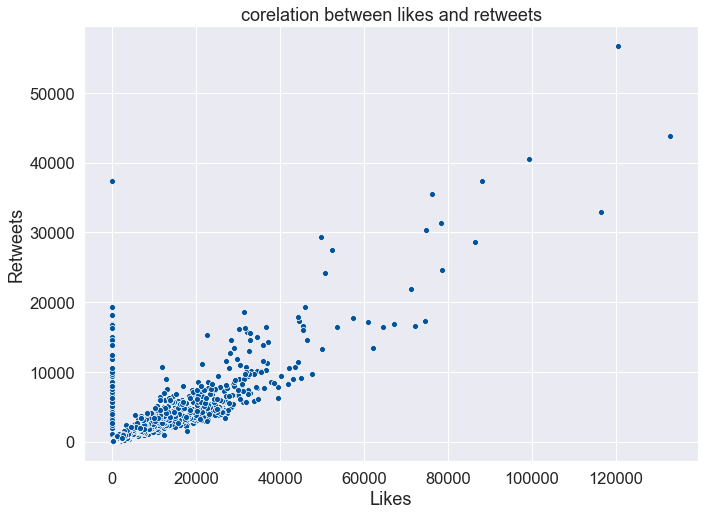

In [61]:
plt.figure(figsize=(11,8))
sns.set(font_scale=1.5)
ax = sns.scatterplot(x='favorites',y='retweets',data=df,color='#00539CFF')
ax.set(xlabel='Likes', ylabel='Retweets')
ax.set_title('corelation between likes and retweets')

>From perceiving the scatter plot, it illustrates the strong relationship between retweets and likes 'favorites'.  The increase in retweets directs to an increase in likes.